### Objective: 
- Determine the number of jobs currently open for various technologies <br>
The technologies we are interested:
C
C#
C++
Java
JavaScript
Python
Scala
Oracle
SQL Server
MySQL Server
PostgreSQL
MongoDB<br>
(The documentation for the GitHub Jobs API can be found at https://jobs.github.com/api)

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [20]:
# before we will write a function for all the technologies
# let's test 1 technology for example

baseurl='https://jobs.github.com/positions.json'

parm = {'description':"Java","page":2}
rp = requests.get(baseurl,parm)
content=rp.json()
len(content)
# there are 63 in total for java

13

The API gives a maximum of 50 jobs per page.<br>
If you get 50 jobs per page, it means there could be some more job listings available.<br>
So if you get 50 jobs per page you should make another API call for next page to check for more jobs.<br>
If you get less than 50 jobs per page, you can take it as the final count.<br>

In [3]:
# define the function for all technologies:

def get_number_of_jobs(technology):
    number_of_jobs = 0
    parm = {"description":technology,'page':1}
    rp = requests.get(baseurl,parm)
    content = rp.json()
    
    if len(content) <50:
        number_of_jobs = len(content)
    else:
        n=1
        while len(content) ==50:
            n += 1
            parm = {"description":technology,'page':n}
            rp = requests.get(baseurl,parm)
            content = rp.json()
            number_of_jobs = 50*(n-1)+len(content) 
            if len(content)<50:
                break        
    return technology,number_of_jobs

In [21]:
# test function for Java

print(get_number_of_jobs('Java'))

('Java', 63)


In [22]:
# apply the function for all technologies
technology=["C","C#","C++","Java","JavaScript","Python","Scala","Oracle","SQL Server","MySQL Server","PostgreSQL","MongoDB"]
new = []
for tech in technology:
    new.append(get_number_of_jobs(tech))

df_noj=pd.DataFrame()
df_noj=df_noj.append(new)

In [24]:
df_noj.head()

,0,1
0,C,132
1,C#,13
2,C++,12
3,Java,63
4,JavaScript,42


Text(0.5, 1.0, 'Counts of Job Openings on GitHub on 11/01/2021 ')

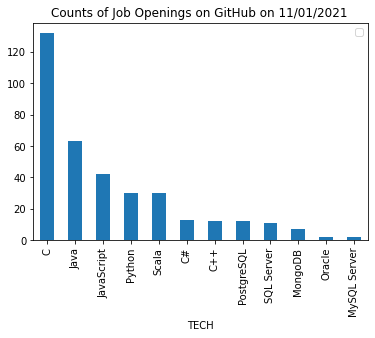

In [27]:
df_noj.rename(columns={0:'TECH',1:'NOJ'},inplace=True)
df_noj.sort_values(by='NOJ',ascending=False,inplace=True)
df_noj.set_index('TECH').plot.bar()
plt.legend('')
plt.title('Counts of Job Openings on GitHub on 11/01/2021 ')

In [29]:
df_noj.to_csv('Github_postjob.csv')